In [1]:
from my_models import *

/net/dali/home/mscbio/aar126/.conda/envs/dehaze/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /net/dali/home/mscbio/aar126/.conda/envs/dehaze/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warn(f"Failed to load image Python extension: {e}")


In [2]:
_, models_avail = getHelp()

Models available: 
 LightDehazeNet 
 LightDehazeNet_KL 
 LighDehazeNet_GL 
 LightDehazeNet_MI 
 LightDehaze_Net_Attn


In [3]:

# current folder
cur_folder = 'src'

# storing paths as string
main_dir = str(os.getcwd()[:-len(cur_folder)])

# old 
weight_dir = main_dir + 'reside/'
dirs = {models_avail[0] : weight_dir + 'trained_weights/', models_avail[1] : weight_dir + 'KL_trained_weights/',
       models_avail[2] : weight_dir + 'GL_trained_weights/', models_avail[3] : weight_dir + 'MI_trained_weights/',
       models_avail[4] : weight_dir + 'ldehaze_attn_trained_weights/'}


# new
# weight_dir = main_dir + 'weights/'
# dirs = {models_avail[0] : weight_dir + str.lower(models_avail[0]), models_avail[1] : weight_dir + str.lower(models_avail[1]),
#        models_avail[2] : weight_dir + str.lower(models_avail[2]), models_avail[3] : weight_dir + str.lower(models_avail[3]),
#        models_avail[4] : weight_dir + str.lower(models_avail[4]), models_avail[5] : weight_dir + str.lower(models_avail[5]),
#        models_avail[6] : weight_dir + str.lower(models_avail[6])}

In [5]:
# load training/validation data
img_dirs = {'hazy' : weight_dir + 'hazy/', 'clear' : weight_dir + 'clear/'}

In [6]:
# validations set is same for all
train_data, validation_data = preparing_training_data(img_dirs['clear'], img_dirs['hazy'])

In [11]:
mdls = {'lhd' : LightDehazeNet(dirs[list(dirs.keys())[0]]), 
        'KL' : LightDehazeNet_KL(dirs[list(dirs.keys())[1]]), 
        'GL' : LightDehazeNet_GL(dirs[list(dirs.keys())[2]]),
        'MI' : LightDehazeNet_MI(dirs[list(dirs.keys())[3]]),
        'attn': LightDehazeNet_Attn(dirs[list(dirs.keys())[4]]),
        'attn_conv': LightDehazeNet_Attn_Conv(dirs[list(dirs.keys())[5]]),
        'attn_conv_big': LightDehazeNet_Attn_Conv_Big(dirs[list(dirs.keys())[6]])}



original_model = LightDehazeNet_Attn(dirs[list(dirs.keys())[4]])

In [ ]:
psnr_dict = {x : [] for x in list(mdls.keys())}

# go through training data for each model:


In [ ]:
# iterate through test data
for clear, hazy in enumerate(test_data):
    
    hazy_image = np.array(Image.open(hazy))
    clear_image = np.array(Image.open(clear))
    
    for m in list(psnr_dict.keys()):
        
        dehazed = mdls[m].image_haze_removel(hazy_image)[0, :, : :].permute(1, 2, 0)
        psnr_dict[m].append(compute_psnr(dehazed.cpu().data.numpy(), clear_image))
        

In [ ]:
# plot
fig = plt.subplot()

for m in list(psnr_dict.keys()):
    plt.plot(0:len(psnr_dict[m]), psnr_dict[m], label = psnr_dict[m])

In [ ]:
# plot 2: image side by side


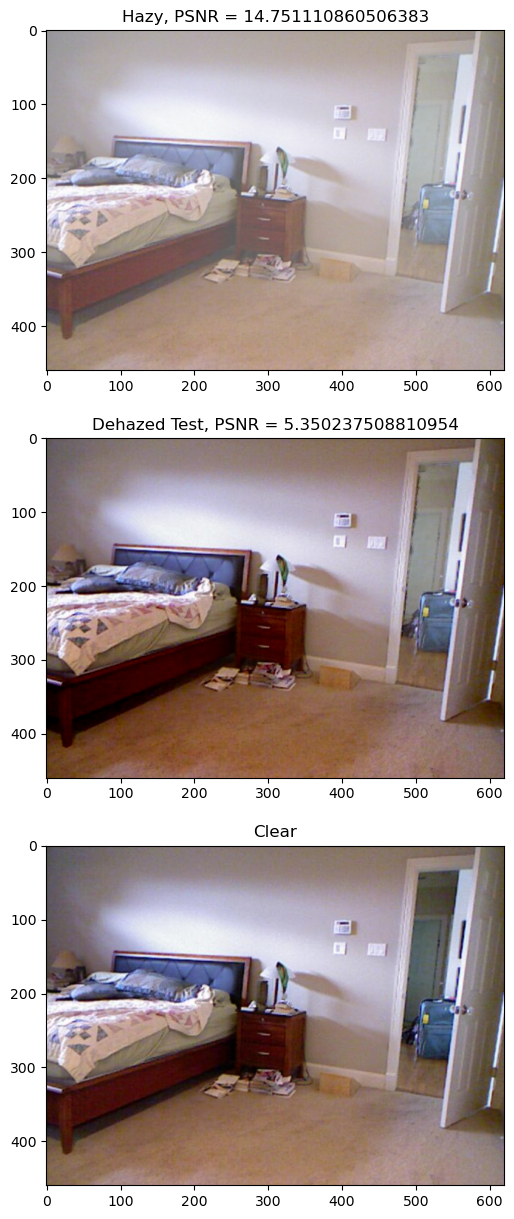

In [8]:
_, _, _, _ = mdls['lhd'].compare_image(validation_data[1], img_dirs, True)

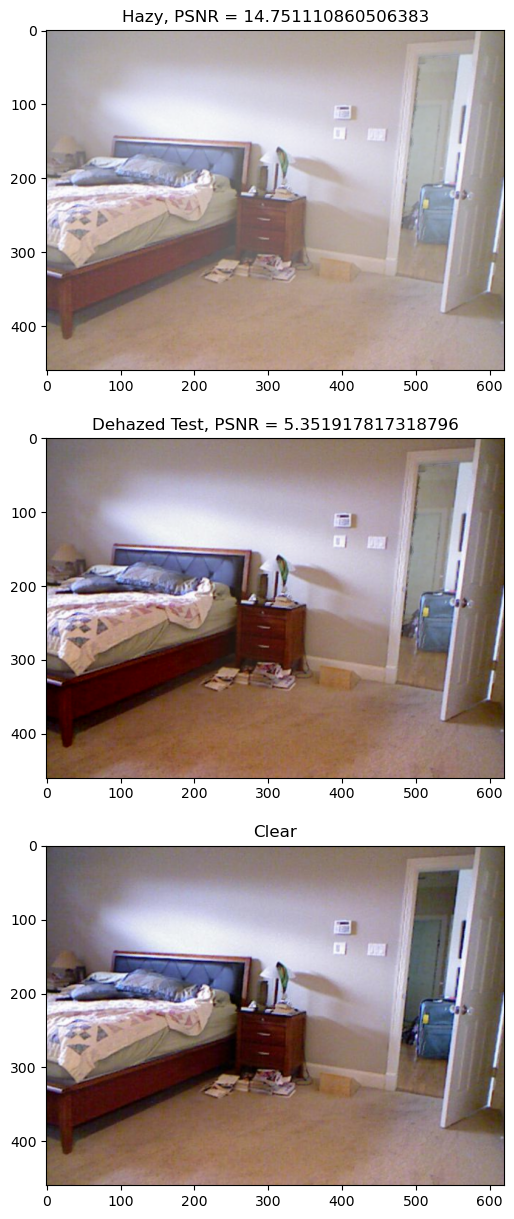

In [9]:
_, _, _, _ = mdls['KL'].compare_image(validation_data[1], img_dirs, True)

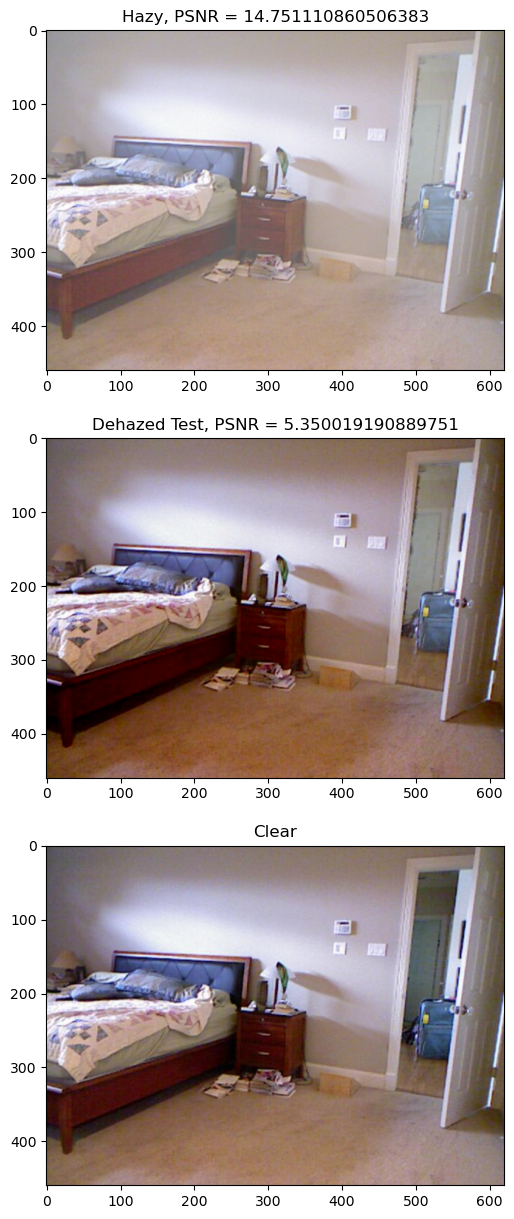

In [12]:
_, _, _, _ = mdls['GL'].compare_image(validation_data[1], img_dirs, True)

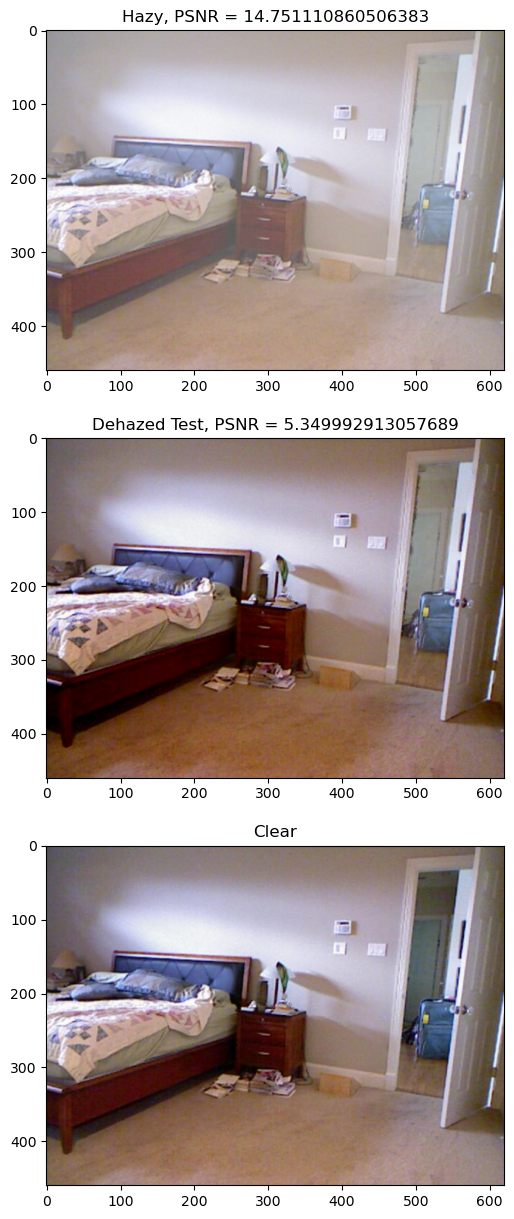

In [14]:
_, _, _, _ = mdls['attn'].compare_image(validation_data[1], img_dirs, True)

In [13]:
main_dir

'/net/dali/home/mscbio/aar126/dehaze/'

In [14]:
weight_dir

'/net/dali/home/mscbio/aar126/dehaze/reside/'